# Predicitve Analysis

## Make dataset to preprocess

In [26]:
import numpy as np
import pandas as pd
import requests
import os
import matplotlib.pyplot as plt
from h3 import h3

In [4]:
raw_df = pd.read_csv("../train.csv")

In [5]:
raw_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [6]:
raw_df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [7]:
feature_df = raw_df

In [8]:
# Change data types of columns
feature_df['pickup_datetime']= pd.to_datetime(feature_df['pickup_datetime']) 
feature_df['dropoff_datetime']= pd.to_datetime(feature_df['dropoff_datetime']) 

In [9]:
feature_df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

### Adding pickup dayOfweek,hour and minute

1. dayOfWeek - (0-6)

0 - Monday
1 - Tuesday
2 - Wednesday
3 - Thursday
4 - Friday
5 - Saturday
6 - Sunday

2. hour - (0-23)
3. minute - (1-59)

In [10]:
feature_df['dayOfWeek'] = feature_df['pickup_datetime'].dt.dayofweek
feature_df['hour'] = feature_df['pickup_datetime'].dt.hour
feature_df['minute'] = feature_df['pickup_datetime'].dt.minute

In [11]:
feature_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dayOfWeek,hour,minute
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0,17,24
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,0,43
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,11,35
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2,19,32
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,5,13,30


### Adding OSRM distance and duration

In [15]:
#call osrm api to get distance and duration
def call_OSRM(Picklon, Picklat, Droplon, Droplat):

    URL = "http://localhost:5000/route/v1/driving/{0},{1};{2},{3}".format(Picklon,Picklat,Droplon,Droplat)
    r = requests.get(URL)
    data = r.json()
    try:
        dis = data['routes'][0]['distance']
        dur = data['routes'][0]['duration']
    except:
        return "No_route","No_route"

    return dis,dur


#add osrm duration and distance to dataframe

def add_OSRM_dis_dur(data_frame): 
        df2 = data_frame
        
        try:
            df2['osrm_distance'],df2['osrm_duration'] = zip(*df2.apply(
                lambda row: call_OSRM(
                   Picklon = row['pickup_longitude'],
                   Picklat = row['pickup_latitude'],
                   Droplon = row['dropoff_longitude'],
                   Droplat = row['dropoff_latitude']

                ),
                axis = 1
            ))
        except Exception as e:
            print(e)
            pass
        return df2

In [18]:
add_OSRM_dis_dur(feature_df)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dayOfWeek,hour,minute,osrm_distance,osrm_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0,17,24,2009.7,165.5
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,0,43,2513.1,332.3
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,11,35,11060.5,773.3
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2,19,32,1779.4,233.8
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,5,13,30,1615.1,172.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,4,13,31,2237.3,311.3
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,6,7,35,7637.6,588.9
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,4,6,57,10172.9,630
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,1,15,56,1236,116.2


In [19]:
feature_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dayOfWeek,hour,minute,osrm_distance,osrm_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0,17,24,2009.7,165.5
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,0,43,2513.1,332.3
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,11,35,11060.5,773.3
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2,19,32,1779.4,233.8
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,5,13,30,1615.1,172.2


In [21]:
feature_df.to_csv("feature_set_with_osrm_dis_dur.csv",index = False)

###  Adding H3 region center location

In [27]:
def get_h3ID(pick_lat, pick_lon, drop_lat, drop_lon, res_pick, res_drop):

        pick_ID = h3.geo_to_h3(pick_lat, pick_lon, res_pick)
        drop_ID = h3.geo_to_h3(drop_lat, drop_lon, res_drop)

        return pick_ID,drop_ID
    
def add_pick_drop_loc_ID(data_frame, res_pick, res_drop):

    df2 = data_frame
    try:
        df2['pick_hex_id'],df2['drop_hex_id'] = zip(*df2.apply(
            lambda row: get_h3ID(
                  pick_lat = row['pickup_latitude'],
                  pick_lon = row['pickup_longitude'],
                  drop_lat = row['dropoff_latitude'],
                  drop_lon = row['dropoff_longitude'],
                  res_pick = res_pick,
                  res_drop = res_drop

                ),
                axis = 1
            ))
    except Exception as e:
            print(e)
            pass

def get_centerloc(pick_cell_ID, drop_cell_ID):

    pick_lat,pick_lon = h3.h3_to_geo(pick_cell_ID)
    drop_lat,drop_lon = h3.h3_to_geo(drop_cell_ID)

    return  pick_lat, pick_lon, drop_lat, drop_lon

def add_centr_lat_lon(dataframe):
    df2 = dataframe
    try:
            df2['pick_hex_centr_lat'], df2['pick_hex_centr_lon'], df2['drop_hex_centr_lat'], df2['drop_hex_centr_lon'] = zip(*df2.apply(
                lambda row: get_centerloc(
                   pick_cell_ID = row['pick_hex_id'],
                   drop_cell_ID = row['drop_hex_id']

                ),
                axis = 1
            ))
    except Exception as e:
            print(e)
            pass
    return df2    

In [28]:
add_pick_drop_loc_ID(feature_df ,res_pick=8,res_drop=8)

In [29]:
add_centr_lat_lon(feature_df)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,hour,minute,osrm_distance,osrm_duration,pick_hex_id,drop_hex_id,pick_hex_centr_lat,pick_hex_centr_lon,drop_hex_centr_lat,drop_hex_centr_on
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,17,24,2009.7,165.5,882a1008b3fffff,882a100d69fffff,40.771055,-73.986556,40.766348,-73.964962
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,0,43,2513.1,332.3,882a100d2bfffff,882a1072cdfffff,40.739591,-73.976764,40.730917,-74.004238
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,11,35,11060.5,773.3,882a100d65fffff,882a107289fffff,40.763188,-73.984107,40.709680,-74.007674
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,19,32,1779.4,233.8,882a1072c7fffff,882a107281fffff,40.717542,-74.010125,40.704168,-74.016008
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,13,30,1615.1,172.2,882a100883fffff,882a100895fffff,40.789953,-73.972303,40.782084,-73.969855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,...,13,31,2237.3,311.3,882a100d29fffff,882a100d27fffff,40.747456,-73.979211,40.736430,-73.995897
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,...,7,35,7637.6,588.9,882a100d25fffff,882a100881fffff,40.744295,-73.998347,40.797823,-73.974752
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,...,6,57,10172.9,630,882a100893fffff,882a107289fffff,40.771860,-73.956611,40.709680,-74.007674
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,...,15,56,1236,116.2,882a100d29fffff,882a100d61fffff,40.747456,-73.979211,40.760835,-73.973311


In [ ]:
feature_df.to_csv("final_feature_set.csv", index = False)

In [30]:
feature_df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dayOfWeek                      int64
hour                           int64
minute                         int64
osrm_distance                 object
osrm_duration                 object
pick_hex_id                   object
drop_hex_id                   object
pick_hex_centr_lat           float64
pick_hex_centr_lon           float64
drop_hex_centr_lat           float64
drop_hex_centr_on            float64
dtype: object

### Making Train Dataset

In [46]:
def make_trainset(dataset):

    dataFile = dataset

    New_Trainset = dataFile[["id",'vendor_id','dayOfWeek','hour','minute','pick_hex_centr_lat',
                           'pick_hex_centr_lon','drop_hex_centr_lat','drop_hex_centr_on','osrm_distance',
                           'osrm_duration','trip_duration']]
    
    New_Trainset = New_Trainset.drop(New_Trainset[New_Trainset.osrm_distance=="No_route"].index)

#     numeric_feats = New_Trainset[['pick_hex_centr_lat', 'pick_hex_centr_lon', 'drop_hex_centr_lat', 'drop_hex_centr_on', 'osrm_distance']].dtypes[New_Trainset.dtypes != "object"].index


#     New_Trainset[numeric_feats] = np.log1p(New_Trainset[numeric_feats])

    return New_Trainset

In [47]:
train_df = make_trainset(feature_df)

In [61]:
 X, y = train_df.iloc[:,~train_df.columns.isin(['id','vendor_id','minute','osrm_duration','trip_duration'])],train_df["trip_duration"]

In [62]:
X.head()

,dayOfWeek,hour,pick_hex_centr_lat,pick_hex_centr_lon,drop_hex_centr_lat,drop_hex_centr_on,osrm_distance
0,0,17,40.771055,-73.986556,40.766348,-73.964962,2009.7
1,6,0,40.739591,-73.976764,40.730917,-74.004238,2513.1
2,1,11,40.763188,-73.984107,40.709680,-74.007674,11060.5
3,2,19,40.717542,-74.010125,40.704168,-74.016008,1779.4
4,5,13,40.789953,-73.972303,40.782084,-73.969855,1615.1


In [63]:
y.head()

0     455
1     663
2    2124
3     429
4     435
Name: trip_duration, dtype: int64

### Model Training

In [64]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [72]:
X = np.array(X)
y = np.array(y)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [74]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Get Prediction

In [75]:
y_pred = regressor.predict(X_test)

In [79]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
0,142,593.389962
1,245,623.059861
2,1200,1209.825347
3,1274,1193.576861
4,626,895.989817


### Check Model Accuracy

In [71]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 442.98130336579123
Mean Squared Error: 9833307.909361163
Root Mean Squared Error: 3135.8105665618837


### Benchmark Test

In [84]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [129]:
def test_set_predict(model,testset):

    train_df=testset
    x_test, y_test = train_df.iloc[:,~train_df.columns.isin(['id','vendor_id','minute','osrm_duration','trip_duration'])],train_df["trip_duration"]


    preds = model.predict(x_test)

    rmse = np.sqrt(mean_squared_error(y_test, preds))

    mae=mean_absolute_error(y_test,preds)


    rmse1 = np.sqrt(mean_squared_error(y_test,train_df[['osrm_duration']]))
    mae1 = mean_absolute_error(y_test,train_df[['osrm_duration']])


    print("RMSE of Linear_reg: %f" % (rmse))
    print("RMSE of OSRM: %f" % (rmse1))

    print("MAE of Linear_reg: %f" % (mae))
    print("MAE of OSRM: %f" % (mae1))

    return rmse,mae,rmse1,mae1

In [130]:
test_set_predict(regressor, train_df)

RMSE of Linear_reg: 5211.063331
RMSE of OSRM: 5243.102230
MAE of Linear_reg: 448.649222
MAE of OSRM: 563.562354


(5211.063331254677, 448.6492224694483, 5243.102229593199, 563.5623543324899)

In [131]:
import matplotlib.pyplot as plt
import numpy as np


def do_benchmark_with_osrm(loaded_model, preprocess_test_new):

    linear_reg_mae_array=[]
    osrm_mae_array=[]
    count_array=[]

    for i in range(1,13):
        try:

            preprocess_test_temp = preprocess_test_new.drop(preprocess_test_new[((preprocess_test_new['osrm_distance']/1000)>0.5*i) | ((preprocess_test_new['osrm_distance']/1000)<=(0.5*i-0.5))].index)
            print("Distance between {}-{}".format((0.5*i-0.5),0.5*i))
            print(len(preprocess_test_temp.index))

            count_array.append(len(preprocess_test_temp.index))

            rmse,mae,rmse1,mae1 = test_set_predict(loaded_model,preprocess_test_temp)

            linear_reg_mae_array.append(mae)
            osrm_mae_array.append(mae1)

        except:

            pass


    distance = np.arange(0,6,0.5)

    plt.plot(distance, linear_reg_mae_array, color='r', label='Linear_reg')
    plt.plot(distance, osrm_mae_array, color='b', label='OSRM')

    plt.ylabel('Mean Absolute Error(min)')
    plt.xlabel('Distance (km)')
    plt.title('Mean Absolute Error variation along with distances')

    plt.legend()
    plt.show()
    print("plot success")

Distance between 0.0-0.5
17957
RMSE of Linear_reg: 3468.942055
RMSE of OSRM: 3481.610140
MAE of Linear_reg: 606.345537
MAE of OSRM: 358.197850
Distance between 0.5-1.0
93999
RMSE of Linear_reg: 2946.877404
RMSE of OSRM: 2950.473680
MAE of Linear_reg: 468.622318
MAE of OSRM: 276.394178
Distance between 1.0-1.5
180483
RMSE of Linear_reg: 2950.238018
RMSE of OSRM: 2962.870068
MAE of Linear_reg: 415.291279
MAE of OSRM: 325.187037
Distance between 1.5-2.0
190368
RMSE of Linear_reg: 2922.261835
RMSE of OSRM: 2945.861758
MAE of Linear_reg: 373.780952
MAE of OSRM: 387.567716
Distance between 2.0-2.5
165430
RMSE of Linear_reg: 6201.260239
RMSE of OSRM: 6218.008144
MAE of Linear_reg: 365.929147
MAE of OSRM: 459.346200
Distance between 2.5-3.0
133411
RMSE of Linear_reg: 3122.666144
RMSE of OSRM: 3164.189726
MAE of Linear_reg: 360.374660
MAE of OSRM: 513.738012
Distance between 3.0-3.5
103123
RMSE of Linear_reg: 2954.776705
RMSE of OSRM: 3003.146334
MAE of Linear_reg: 351.806306
MAE of OSRM: 543.8

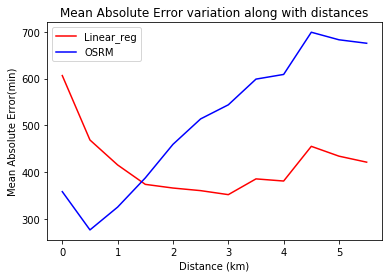

plot success


In [132]:
do_benchmark_with_osrm(regressor, train_df)